Dimensionality Reduction Techniques:

Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


Step 2: Load and Preprocess the Heart Disease Dataset

In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Feature scaling (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.drop('target', axis=1).columns)
df_scaled['target'] = df['target']


Step 3: Apply PCA and t-SNE for Dimensionality Reduction
Principal Component Analysis (PCA)

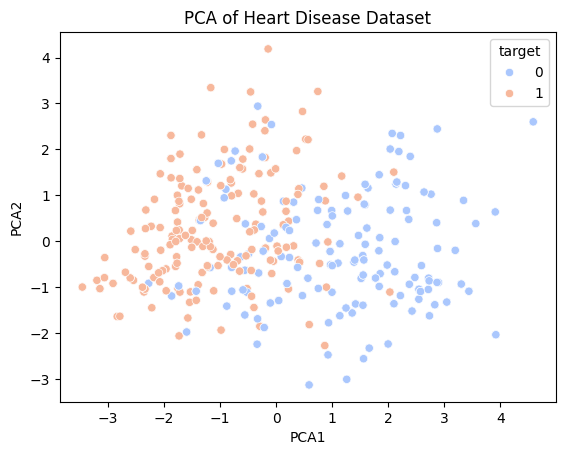

In [3]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(df_scaled.drop('target', axis=1))

# Convert PCA result back to DataFrame
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
df_pca['target'] = df['target']

# Visualize the PCA result
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='target', palette='coolwarm')
plt.title('PCA of Heart Disease Dataset')
plt.show()


t-SNE (t-distributed Stochastic Neighbor Embedding)

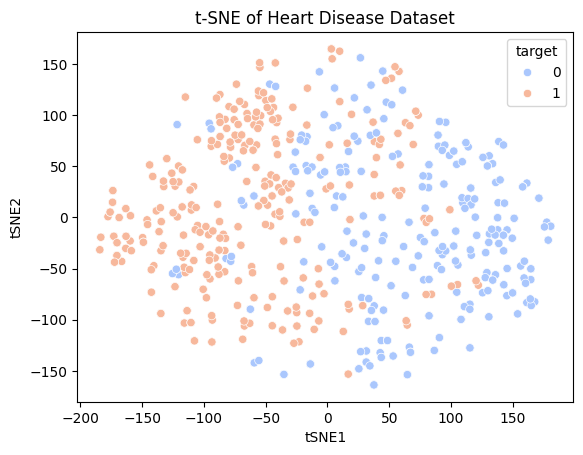

In [4]:
# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(df_scaled.drop('target', axis=1))

# Convert t-SNE result back to DataFrame
df_tsne = pd.DataFrame(tsne_data, columns=['tSNE1', 'tSNE2'])
df_tsne['target'] = df['target']

# Visualize the t-SNE result
sns.scatterplot(data=df_tsne, x='tSNE1', y='tSNE2', hue='target', palette='coolwarm')
plt.title('t-SNE of Heart Disease Dataset')
plt.show()


Step 4: Train Classification Models on Original and Reduced Datasets
Prepare Training and Test Data

In [5]:
# Prepare data for training (excluding target variable)
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Logistic Regression Model on the Original Data

In [6]:
# Train a Logistic Regression model on original data
model_original = LogisticRegression()
model_original.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Accuracy of Logistic Regression on original data: {accuracy_original:.2f}")
print(classification_report(y_test, y_pred_original))


Accuracy of Logistic Regression on original data: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Train Logistic Regression Model on PCA Reduced Data

In [7]:
# Train a Logistic Regression model on PCA reduced data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Predict and evaluate the model
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy of Logistic Regression on PCA reduced data: {accuracy_pca:.2f}")
print(classification_report(y_test, y_pred_pca))


Accuracy of Logistic Regression on PCA reduced data: 0.77
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       102
           1       0.74      0.84      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.77      0.77       205



Train Logistic Regression Model on t-SNE Reduced Data

In [8]:
# Train a Logistic Regression model on t-SNE reduced data
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

model_tsne = LogisticRegression()
model_tsne.fit(X_train_tsne, y_train)

# Predict and evaluate the model
y_pred_tsne = model_tsne.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

print(f"Accuracy of Logistic Regression on t-SNE reduced data: {accuracy_tsne:.2f}")
print(classification_report(y_test, y_pred_tsne))


Accuracy of Logistic Regression on t-SNE reduced data: 0.76
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       102
           1       0.73      0.81      0.77       103

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



Step 5: Compare Model Performance

In [9]:
# Compare accuracy scores of original, PCA, and t-SNE models
print(f"Accuracy on original data: {accuracy_original:.2f}")
print(f"Accuracy on PCA reduced data: {accuracy_pca:.2f}")
print(f"Accuracy on t-SNE reduced data: {accuracy_tsne:.2f}")


Accuracy on original data: 0.80
Accuracy on PCA reduced data: 0.77
Accuracy on t-SNE reduced data: 0.76


Step 6: Analyze and Report the Trade-offs
Trade-off Analysis:
PCA: PCA is a linear transformation technique that preserves the directions of maximum variance in the data. Reducing dimensions can speed up the model training and decrease overfitting if there’s high correlation in the features. However, too much reduction might lose important information.

t-SNE: t-SNE is a non-linear dimensionality reduction technique that is excellent for visualization. It is computationally more expensive than PCA and is often used for visualizing high-dimensional data rather than for direct model training. It might not preserve global structure but can capture local patterns better.

Model Performance: In practice, applying PCA can significantly speed up training, especially for high-dimensional datasets. However, the trade-off might be a slight loss in accuracy. t-SNE, being a non-linear technique, is typically not used directly for model training, but can be useful for data exploration and visual understanding.